In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data from csv file, create headers for each column based on the LabView VI.
df = pd.read_csv('fullstate_square.csv', index_col=False, skiprows=26, delimiter='\t',
                names=['time_s', 'goal_deg', 'true_deg', 'vel_deg', 'amp', 'freq_hz',
                         'sin0_or_sqr1', 'cmd_sig', 'controller'])
df.insert(3, 'error', df['goal_deg'] - df['true_deg'], True)
df.head()

,time_s,goal_deg,true_deg,error,vel_deg,amp,freq_hz,sin0_or_sqr1,cmd_sig,controller
0,0.016496,113.0,0.000000,113.000000,0.000000,113.0,0.25,1.0,990.738800,1.0
1,0.016996,113.0,0.000000,113.000000,0.000000,113.0,0.25,1.0,990.738374,1.0
2,0.017496,113.0,0.000362,112.999638,-0.034239,113.0,0.25,1.0,990.738452,1.0
3,0.017996,113.0,0.001747,112.998253,-0.186374,113.0,0.25,1.0,990.742766,1.0
4,0.018496,113.0,0.004329,112.995671,-0.522057,113.0,0.25,1.0,990.753964,1.0


<Axes: xlabel='time_s'>

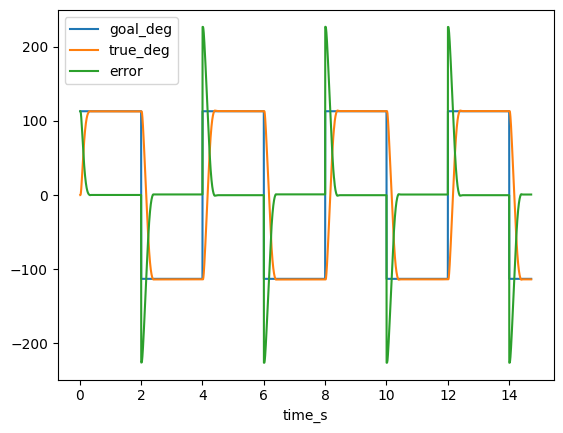

In [3]:
df.plot(x="time_s", y=['goal_deg', 'true_deg','error'])

<Axes: title={'center': 'Position vs Time'}, xlabel='Time (s)', ylabel='Platen Position (deg)'>

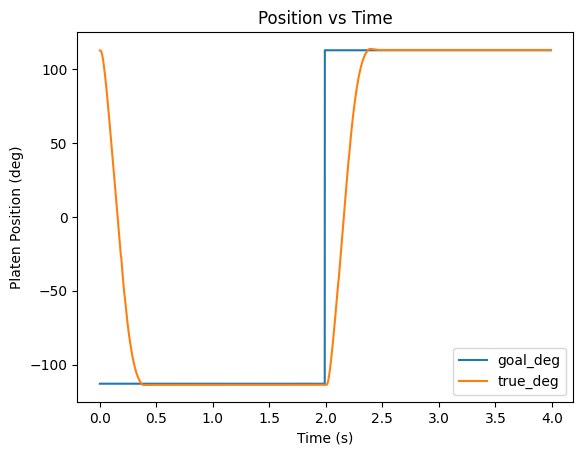

In [4]:
# Isolate one cycle
df = df[df['time_s'] > 2.01]
df = df[df['time_s'] < 6]

df['time_s'] = df['time_s'] - df['time_s'].min()

df.plot(x="time_s", y=['goal_deg', 'true_deg'], title = "Position vs Time", xlabel = 'Time (s)', ylabel = 'Platen Position (deg)')

In [5]:
# Mean, sdt, rms error
mean_error = np.mean(abs(df['error']))
std_error = np.std(df['error'])
rms_error = np.sqrt(np.mean(np.square(df['error'])))
print(f'mean: {mean_error} \n\nstd: {std_error} \n\nrms: {rms_error}')

mean: 19.396051978323882 

std: 55.48655945726306 

rms: 55.49277959617394


In [6]:
# Command statistics
command_mean = np.mean(abs(df['cmd_sig']))
command_std = np.std(df['cmd_sig'])
rms_command = np.sqrt(np.mean(np.square(df['cmd_sig'])))
print(f'mean: {command_mean} \n\nstd: {command_std} \n\nrms: {rms_command}')

mean: 160.90711271821044 

std: 468.63178630470895 

rms: 468.6924557676929


In [7]:
# Find percent overshoot
max = df['true_deg'].max()
overshoot = max - df['goal_deg'].max()
pc_overshoot = ((max/df['goal_deg'].max())-1)*100
print(overshoot, pc_overshoot)

0.9116190000000017 0.8067424778761101


In [8]:
# Rise and settling time
rise = 0.86749 # seconds
# Settle not applicable

### fullstate
error

mean: -0.0884414472589774 

std: 290.2554752037158 

rms: 290.255488677862


command:

mean: 7.541018393320746 

std: 468.63178630470895 

rms: 468.6924557676929

OS & %OS 0.9116190000000017 0.8067424778761101

rise = 0.2788 # seconds

settle = 0.3538